In [1]:
import numpy as np
from tqdm import tqdm
import os
import image_processor

from keras.applications.vgg16 import VGG16 
from keras.models import Model


model_ft = VGG16()
model_ft = Model(inputs= model_ft.inputs,outputs = model_ft.layers[-2].output)

images, filenames = image_processor.processFolder("test/")




Importing: 100%|██████████| 100% 100/100 [00:00]

['test\\0.png', 'test\\1.png', 'test\\10.png', 'test\\11.png', 'test\\12.png', 'test\\13.png', 'test\\14.png', 'test\\15.png', 'test\\16.png', 'test\\17.png', 'test\\18.png', 'test\\19.png', 'test\\2.png', 'test\\20.png', 'test\\21.png', 'test\\22.png', 'test\\23.png', 'test\\24.png', 'test\\25.png', 'test\\26.png', 'test\\27.png', 'test\\28.png', 'test\\29.png', 'test\\3.png', 'test\\30.png', 'test\\31.png', 'test\\32.png', 'test\\33.png', 'test\\34.png', 'test\\35.png', 'test\\36.png', 'test\\37.png', 'test\\38.png', 'test\\39.png', 'test\\4.png', 'test\\40.png', 'test\\41.png', 'test\\42.png', 'test\\43.png', 'test\\44.png', 'test\\45.png', 'test\\46.png', 'test\\47.png', 'test\\48.png', 'test\\49.png', 'test\\5.png', 'test\\50.png', 'test\\51.png', 'test\\52.png', 'test\\53.png', 'test\\54.png', 'test\\55.png', 'test\\56.png', 'test\\57.png', 'test\\58.png', 'test\\59.png', 'test\\6.png', 'test\\60.png', 'test\\61.png', 'test\\62.png', 'test\\63.png', 'test\\64.png', 'test\\65.png'

In [2]:
from keras.applications.vgg16 import preprocess_input 
x = preprocess_input(images)

features = model_ft.predict(x, use_multiprocessing=True, verbose=0)

extract just the features

In [4]:

print(f"results shaped {features.shape}")
feat = features.reshape(-1,4096)
print(f"reshaped shape is {feat.shape}")

results shaped (100, 4096)
reshaped shape is (100, 4096)


reduce these dimensions a bit:

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

Then group the data into clusters - we know we have 2 here - the white patches and the red crab toy:

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=22,n_init="auto")
kmeans.fit(x)

KMeans(n_clusters=2, n_init='auto', random_state=22)

we then have a broad sense of their locations and need to label the data points

In [6]:


groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

OK, so let's look at our clusters:

In [7]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img 
def view_cluster(cluster):
    plt.figure(figsize = (25,25))
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 30 images to be shown at a time
    if len(files) > 60:
        print(f"Clipping cluster size from {len(files)} to 60")
        files = files[:59]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1)
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

Let's look

Clipping cluster size from 98 to 60


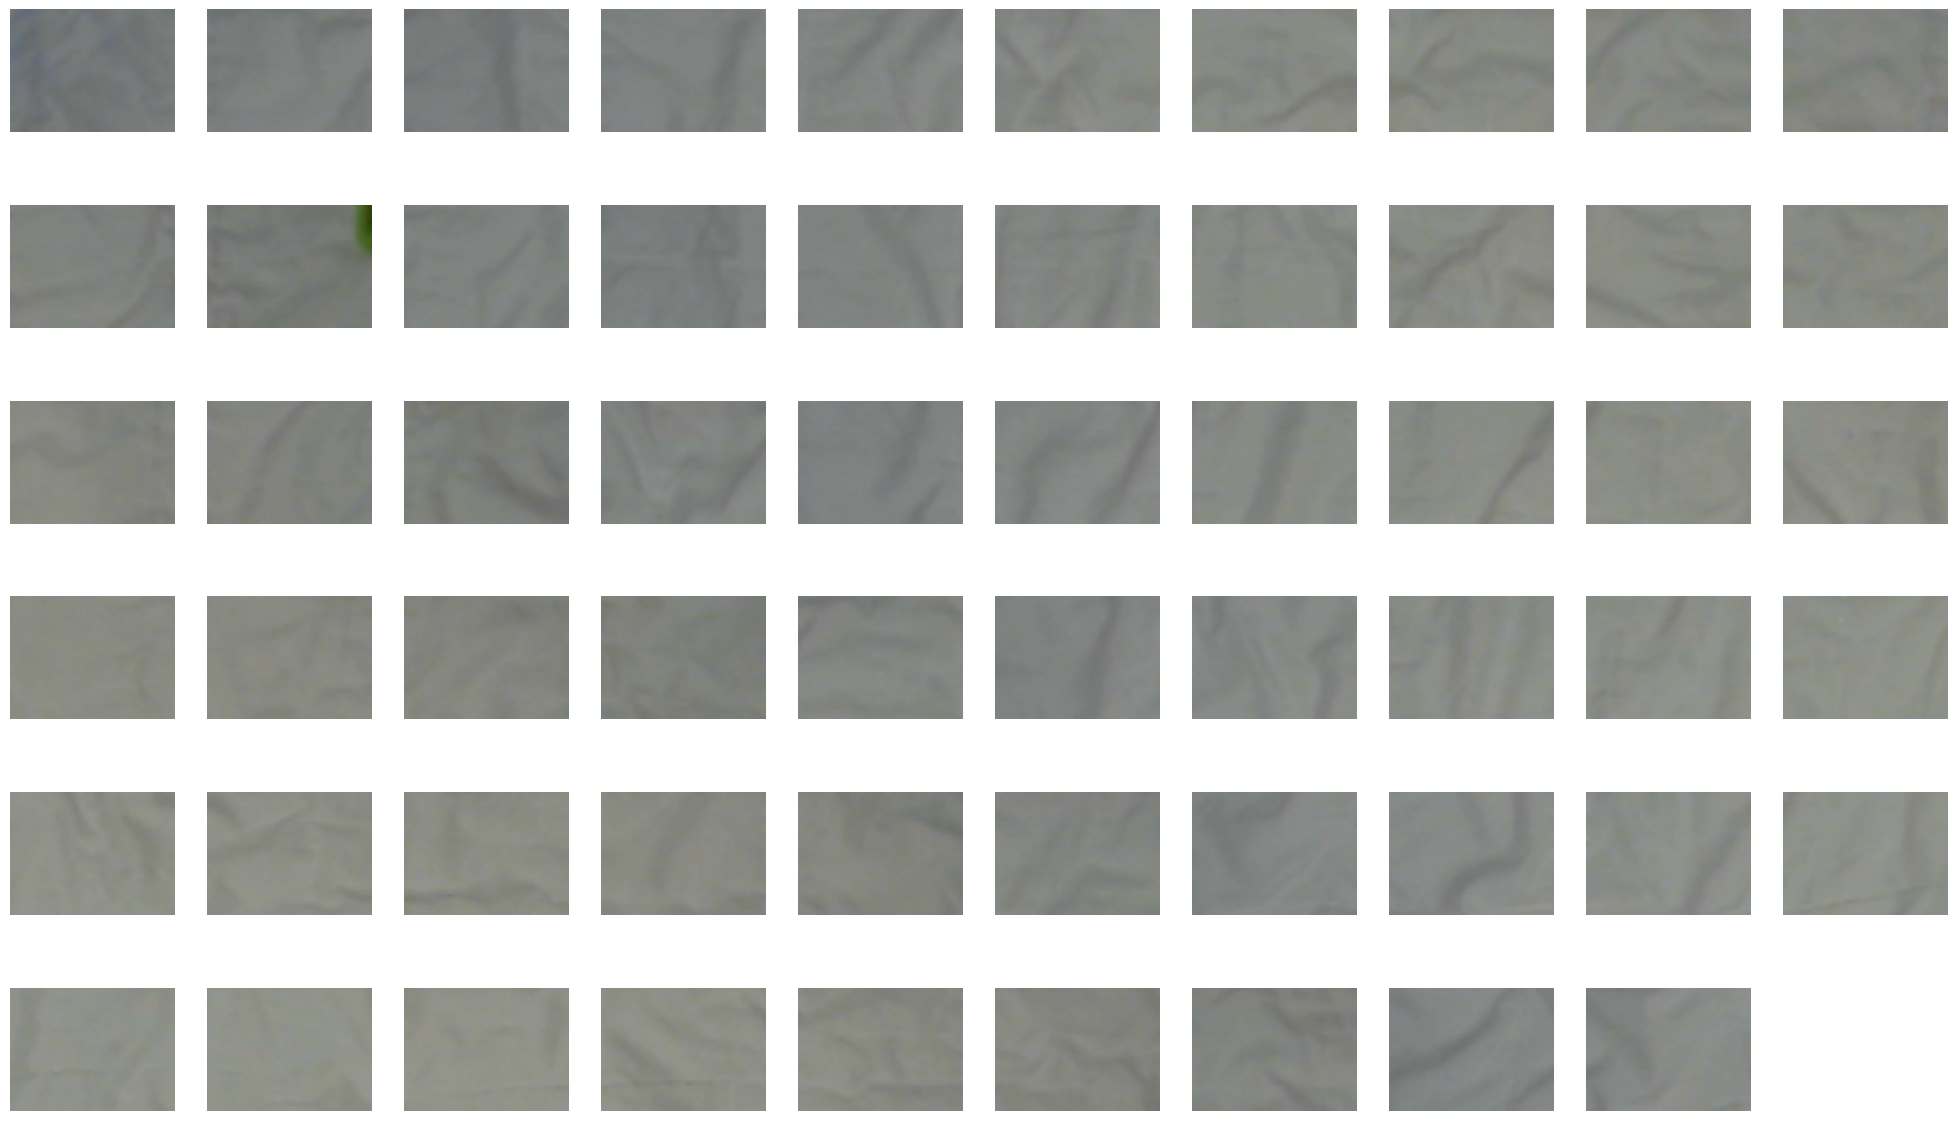

In [8]:
view_cluster(0)

And 1?

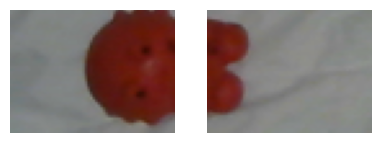

In [9]:
view_cluster(1)